### Import Packages

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

### Read the Data into Pandas Dataframe

In [42]:
#Defining column names
colnames= ['symboling', 'normalized-losses' ,'make' ,'fuel-type', 'aspiration', 'num-of-doors' ,'body-style' ,'drive-wheels' ,
           'engine-location' , 'wheel-base' , 'length' , 'width' , 'height' , 'curb-weight' , 'engine-type' ,
            'num-of-cylinders', 'engine-size', 'fuel-system' , 'bore' , 'stroke' , 'compression-ratio' , 'horsepower', 
           'peak-rpm' , 'city-mpg', 'highway-mpg' ,'price']

In [43]:
#Reading the data from UCI data repository
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url, header=None , names=colnames)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning

In [44]:
df.shape

(205, 26)

In [45]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Get Data Types of all variables

In [46]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Dealing with Missing Values

In [47]:
#It is given in the documentation that the missing values in the data ar denoted by '?'
#Let us replace them with NaN for more clarity
df=df.replace('?', np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [49]:
#Drop rows which have missing values for the Target variable price
df.dropna(subset=['price'], axis='index' , inplace= True)

In [50]:
df[df.isnull().any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [51]:
df.fillna(df.median(), inplace=True)

In [52]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

#### Converting Data Types

In [53]:
categorical_cols=df.columns.values[df.dtypes =='object']
for col in categorical_cols:
    print_list=[col,df[col].nunique()]
    print('Unique Value count of {} is: {}'. format(*print_list))


Unique Value count of normalized-losses is: 52
Unique Value count of make is: 22
Unique Value count of fuel-type is: 2
Unique Value count of aspiration is: 2
Unique Value count of num-of-doors is: 2
Unique Value count of body-style is: 5
Unique Value count of drive-wheels is: 3
Unique Value count of engine-location is: 2
Unique Value count of engine-type is: 6
Unique Value count of num-of-cylinders is: 7
Unique Value count of fuel-system is: 8
Unique Value count of bore is: 39
Unique Value count of stroke is: 37
Unique Value count of horsepower is: 59
Unique Value count of peak-rpm is: 23
Unique Value count of price is: 186


In [54]:
#All the Categorical Variables with unique values>10 should be examined to see if they are more like Integer Variables.
#Then decision will be made to convert these variables into Integer variables for better handling of data
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())

normalized-losses
115.0    37
161      11
91        8
150       7
104       6
134       6
128       6
103       5
95        5
94        5
65        5
168       5
102       5
74        5
85        5
93        4
148       4
122       4
118       4
106       4
125       3
83        3
137       3
115       3
154       3
101       3
108       2
113       2
188       2
164       2
87        2
158       2
119       2
145       2
192       2
110       2
129       2
194       2
89        2
81        2
153       2
197       2
186       1
90        1
256       1
142       1
78        1
121       1
98        1
107       1
231       1
77        1
Name: normalized-losses, dtype: int64
make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche        

In [55]:
# normalized-losses,horsepower, peak-rpm, price should be converted to integer types int64
#bore, stroke should be converted to float types float64
df['normalized-losses']= df['normalized-losses'].astype('int64')
df['horsepower']= df['horsepower'].astype('int64')
df['peak-rpm']= df['peak-rpm'].astype('int64')
df['price']= df['price'].astype('int64')
df['bore']= df['bore'].astype('float64')
df['stroke']= df['stroke'].astype('float64')

## Exploratory Data Analysis

#### Get the distribution of the Target Variable: price

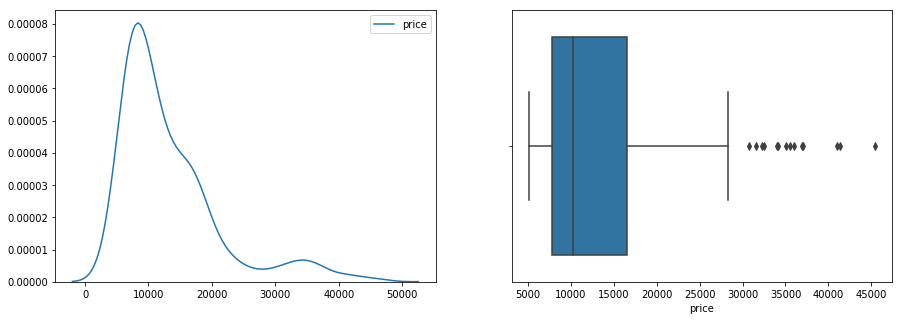

In [56]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.kdeplot(df['price'])
plt.subplot(1,2,2)
sns.boxplot(df['price'])

In [57]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [58]:
categorical_cols=df.columns.values[df.dtypes =='object']
numerical_cols= df.columns.values[(df.dtypes== 'int64') | (df.dtypes=='float64')]

#### Plot the distribution of Categorical variables against the Target Variable

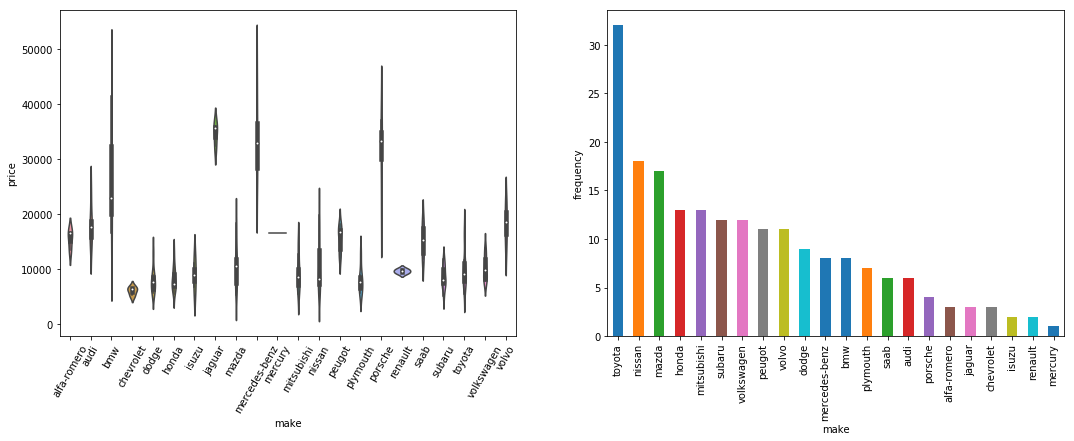

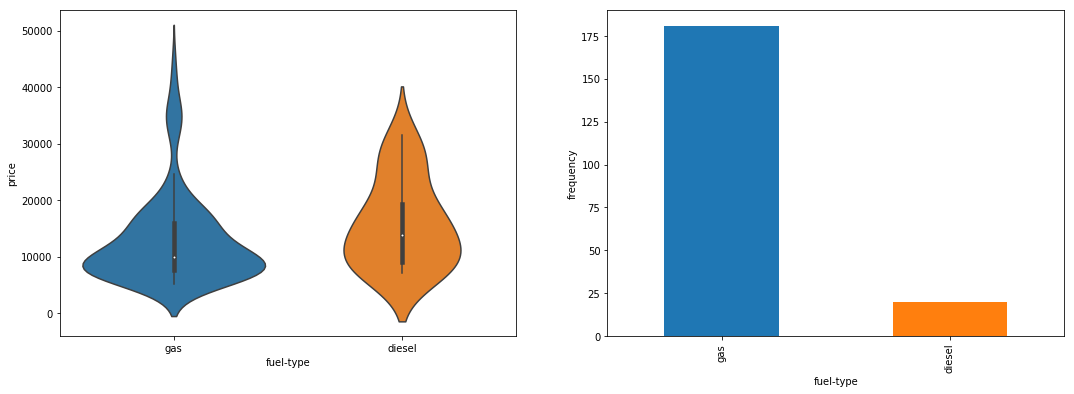

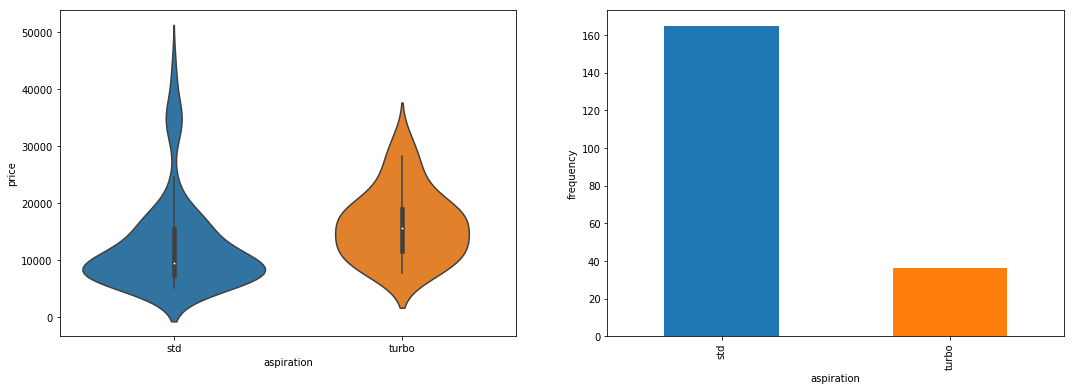

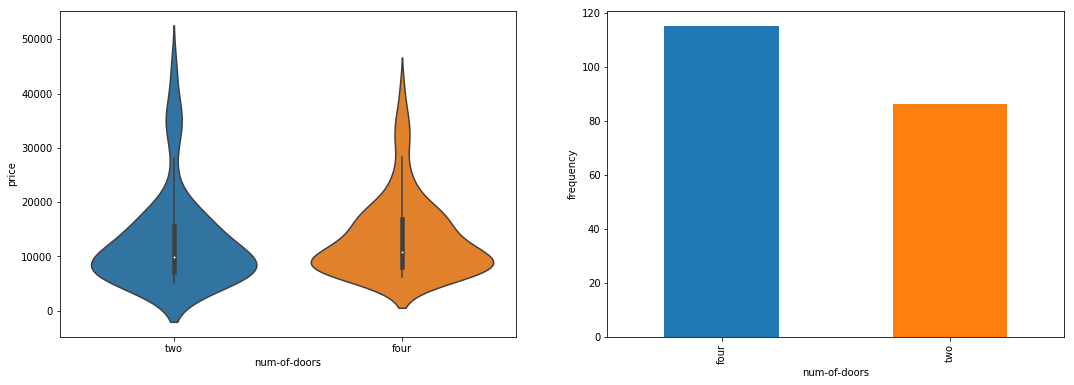

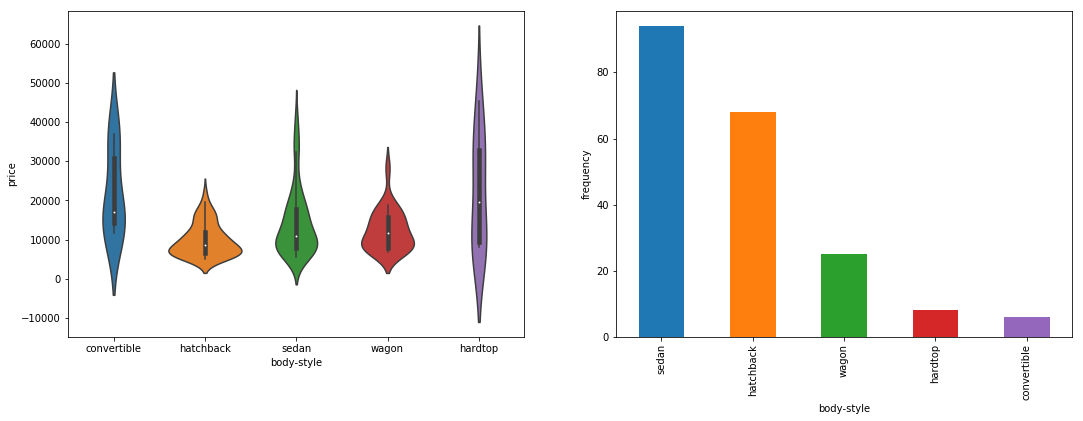

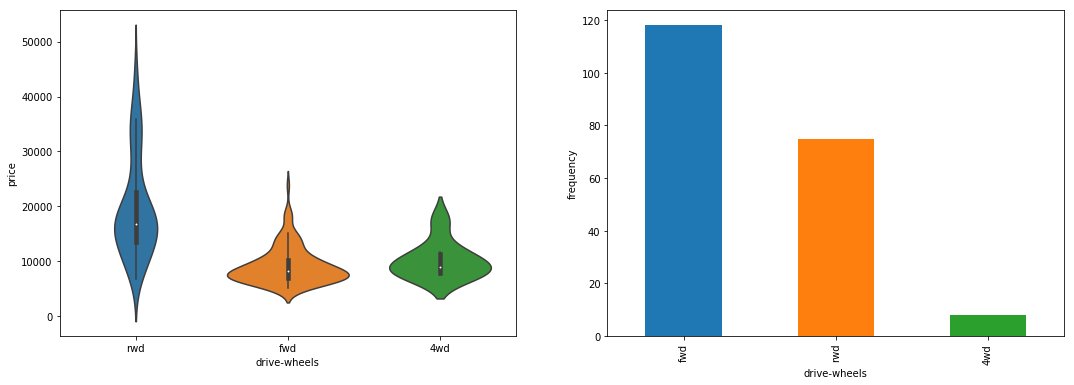

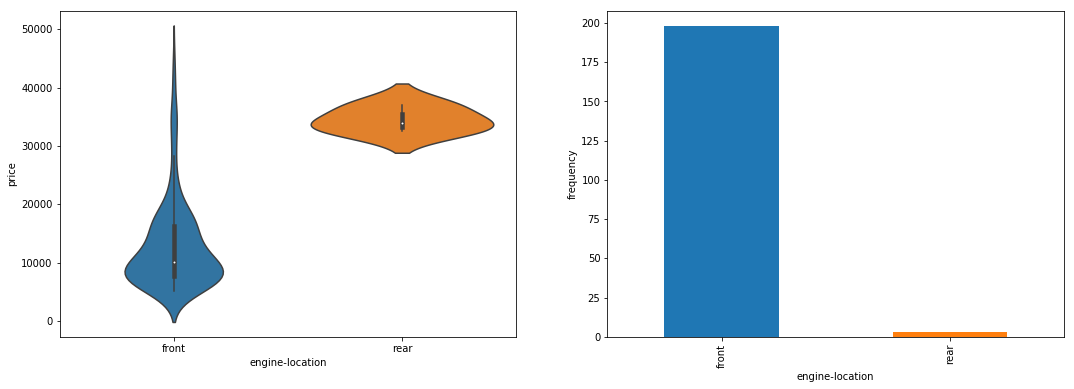

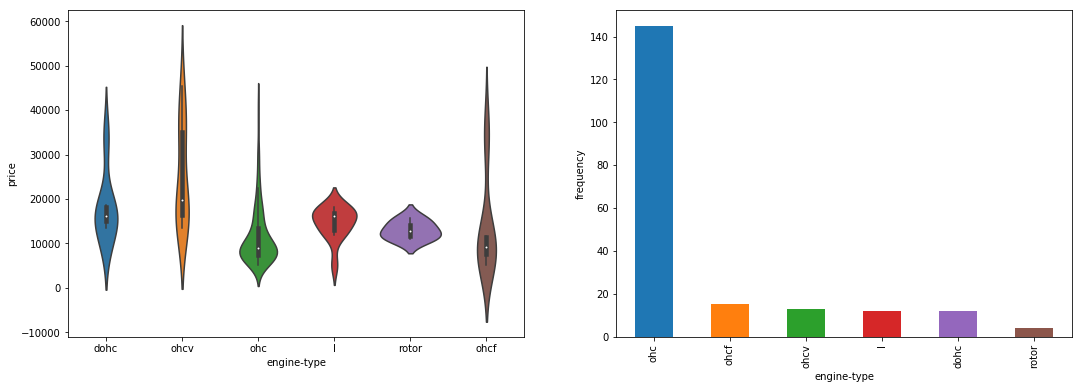

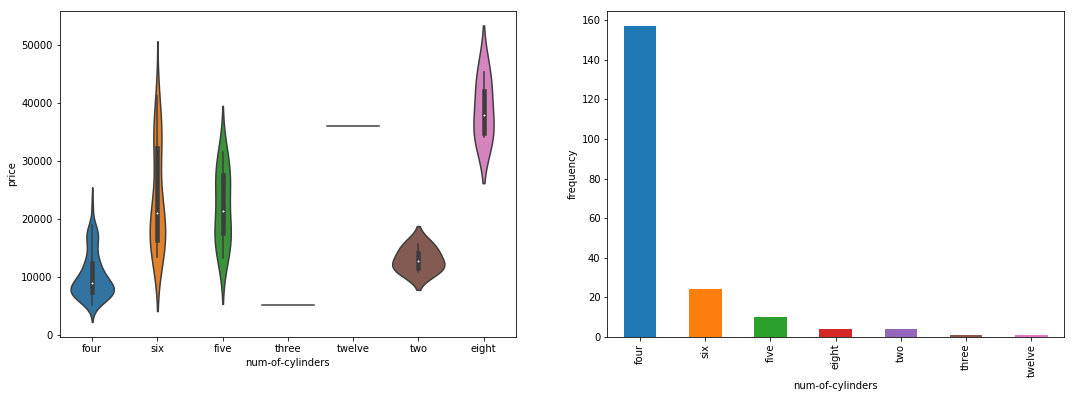

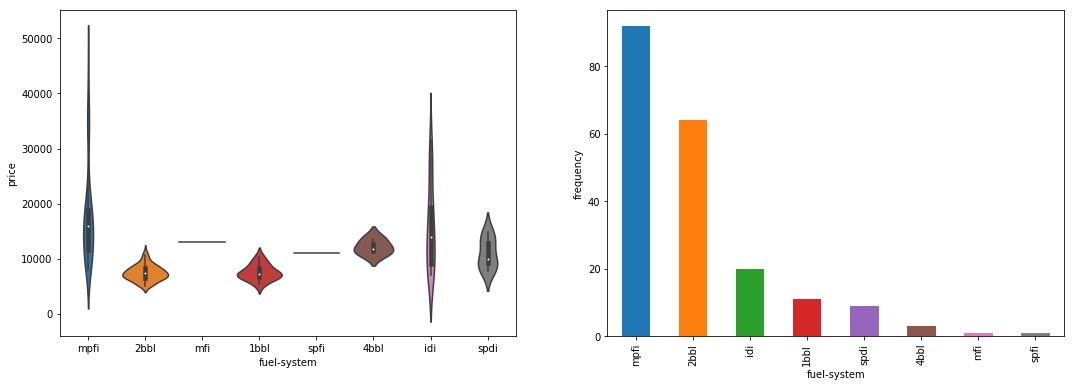

In [59]:
for col in categorical_cols:
    plt.figure(figsize=[18,6])
    plt.subplot(1,2,1)
    sns.violinplot(df[col], df['price'])
    if df[col].nunique() > 10:
        plt.xticks(rotation=60)    
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('frequency')

#### Plot the distribution of Numerical variables against the Target Variable

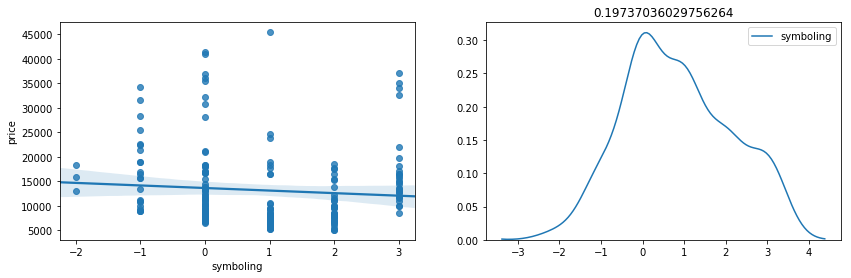

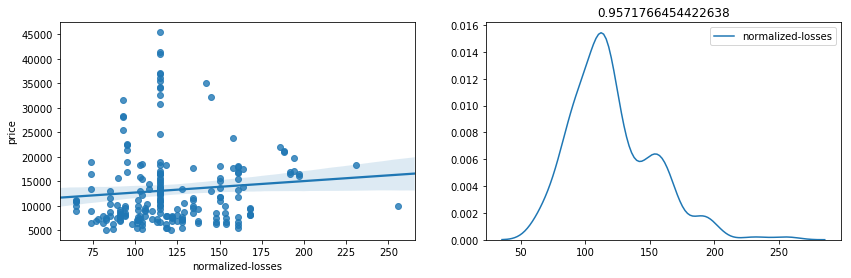

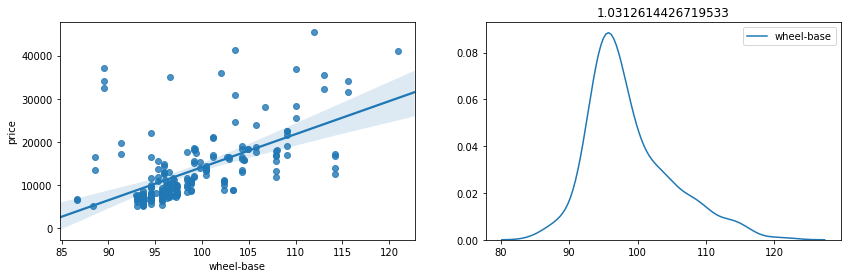

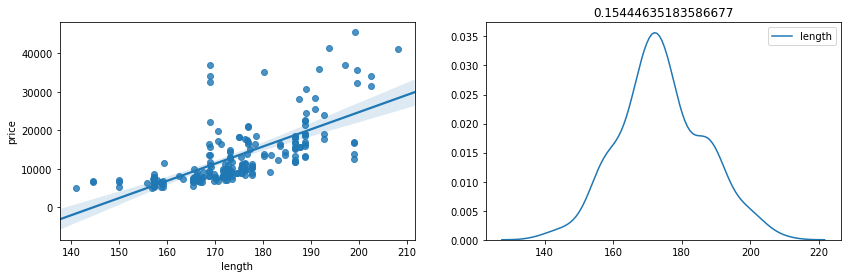

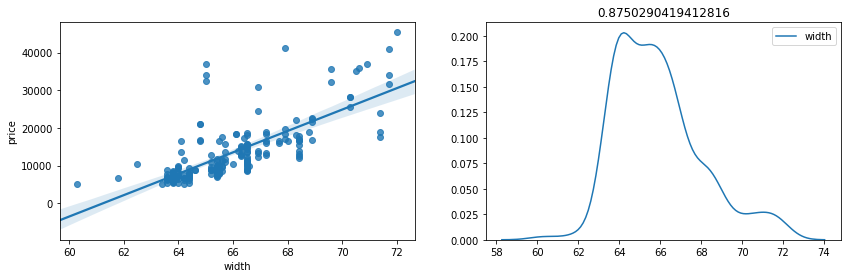

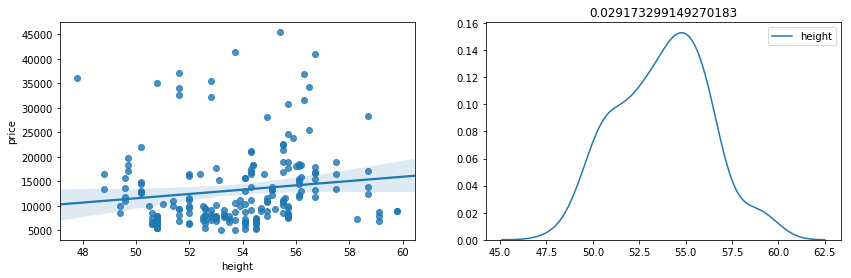

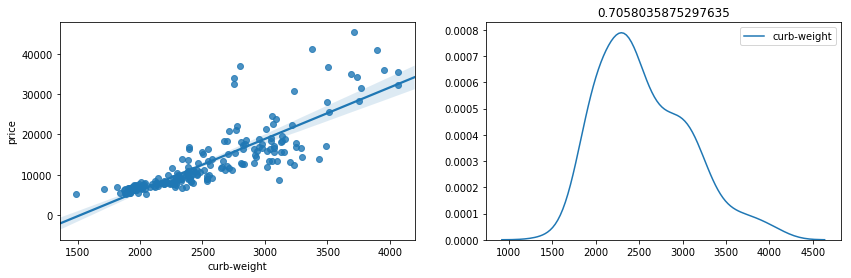

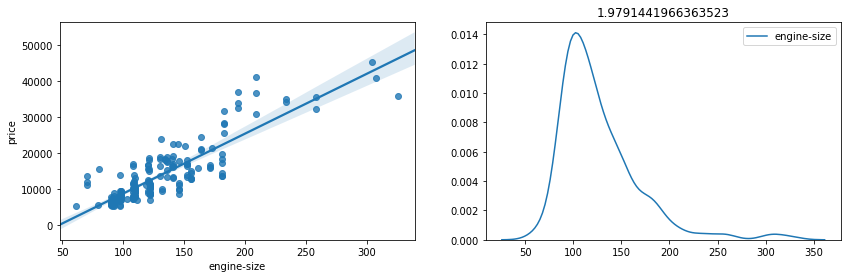

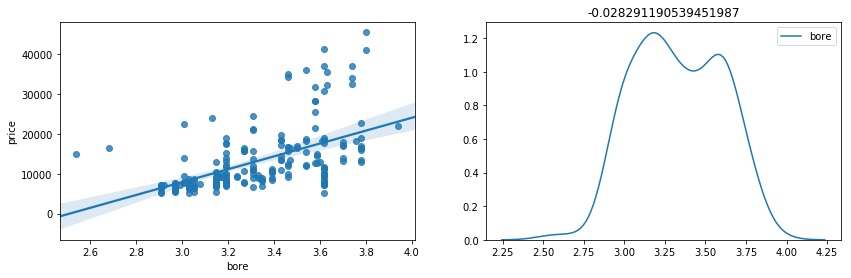

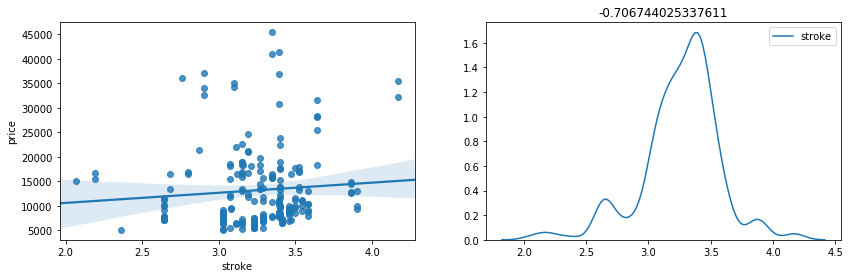

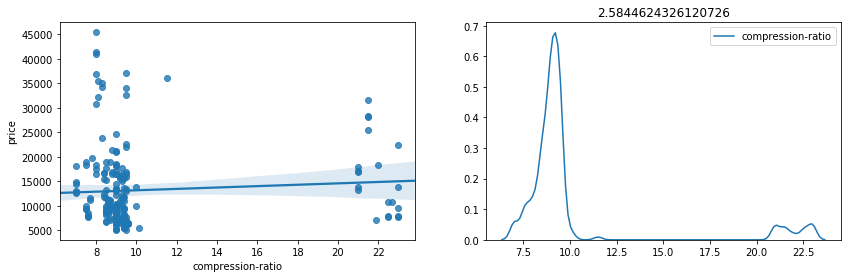

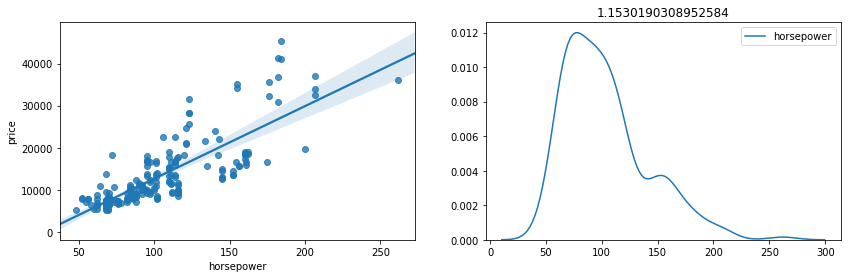

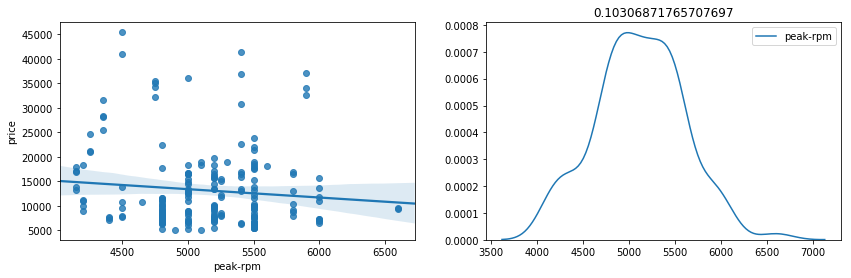

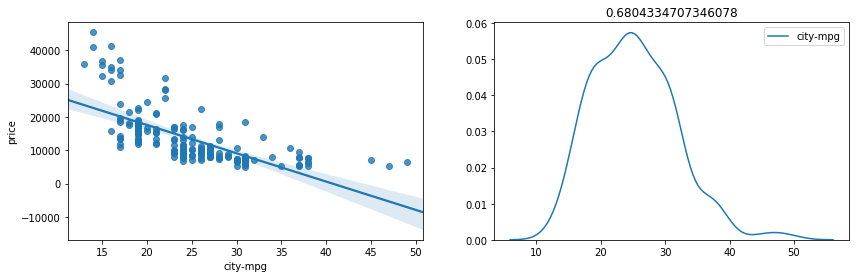

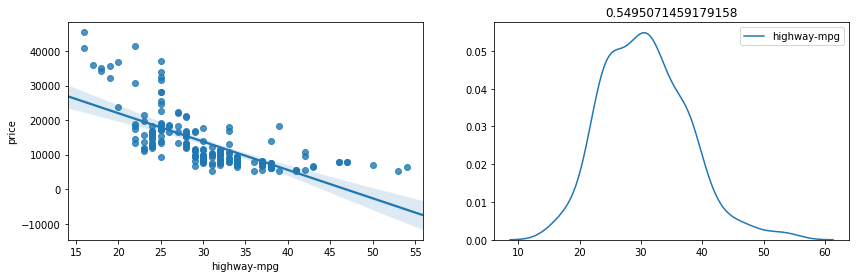

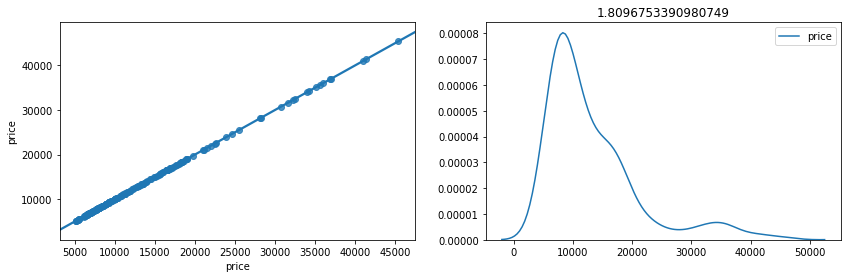

In [60]:
for col in numerical_cols:
    plt.figure(figsize=[14,4])
    plt.subplot(1,2,1)
    sns.regplot(df[col],df['price'])
    plt.subplot(1,2,2)
    sns.kdeplot(df[col])
    plt.title(df[col].skew())

Text(0,0.5,'frequency')

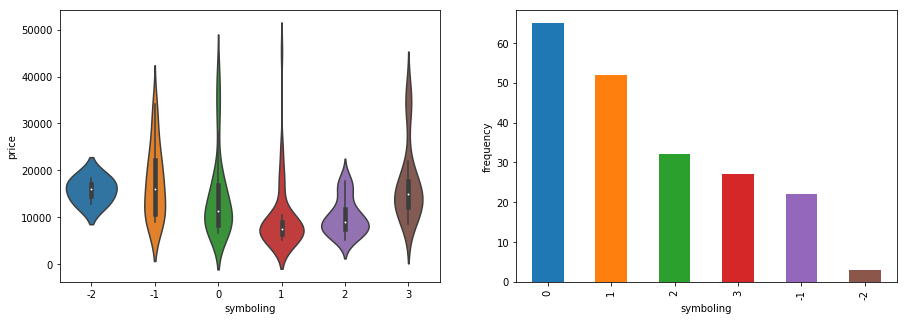

In [61]:
# The plot of symboling against price suggests that although symboling is a numerical variable, 
#its distribution behaves more like a categorical variable
#Let us plot symboling again as a categorical variable:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.violinplot(df['symboling'], df['price'])    
plt.subplot(1,2,2)
df['symboling'].value_counts().plot(kind='bar')
plt.xlabel('symboling')
plt.ylabel('frequency')

### Transformation of Variables

In [62]:
df_trans=pd.DataFrame()

#### Numerical Variables

In [63]:
for col in numerical_cols:
    if skew(np.abs(df[col])) > 1.0:
        df_trans[col]=np.log(1 + df[col])
    else:
        df_trans[col]=df[col]
''' The domain for log is strictly greater than 0. That’s a vertical asymptote heading down the y-axis.
As x approaches 0, y approaches negative infinity. In other words, 0 is excluded from the domain.
Many of my data points are 0 because many reviews received no helpful votes.
For a quick fix, I can add 1 to each data point. This works well since the log of 1 is 0. 
Furthermore, the same spread is retained since all points are increased by 1.
Source: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16
'''

' The domain for log is strictly greater than 0. That’s a vertical asymptote heading down the y-axis.\nAs x approaches 0, y approaches negative infinity. In other words, 0 is excluded from the domain.\nMany of my data points are 0 because many reviews received no helpful votes.\nFor a quick fix, I can add 1 to each data point. This works well since the log of 1 is 0. \nFurthermore, the same spread is retained since all points are increased by 1.\nSource: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16\n'

In [64]:
for col in numerical_cols:
    print(col)
    print(df_trans[col].skew())

symboling
0.19737036029756264
normalized-losses
0.9571766454422638
wheel-base
0.8673776111947932
length
0.15444635183586677
width
0.8750290419412816
height
0.029173299149270183
curb-weight
0.7058035875297635
engine-size
0.8738658451989667
bore
-0.028291190539451987
stroke
-0.706744025337611
compression-ratio
2.3685954831157425
horsepower
0.40072835730572015
peak-rpm
0.10306871765707697
city-mpg
0.6804334707346078
highway-mpg
0.5495071459179158
price
0.6787282700171771


In [65]:
df_trans.shape

(201, 16)

#### Categorical Variables

In [66]:
for col in categorical_cols:
    df_trans= df_trans.merge(pd.get_dummies(df[[col]]), how='inner', left_index=True, right_index=True)

In [67]:
df_trans.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,4.495355,168.8,64.1,48.8,2548,4.875197,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,115,4.495355,168.8,64.1,48.8,2548,4.875197,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,115,4.559126,171.2,65.5,52.4,2823,5.030438,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164,4.613138,176.6,66.2,54.3,2337,4.700480,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164,4.609162,176.6,66.4,54.3,2824,4.919981,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [68]:
df_trans.columns.values

array(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'num-of-doors_four', 'num-of-doors_two',
       'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear',
    

### Divide the data into test-train

In [69]:
X= df_trans.drop('price', axis='columns')
y=df_trans['price']

In [70]:
X_train, X_test,y_train, y_test= train_test_split(X,y, random_state=123, test_size=0.30)

### Correlation Matrix

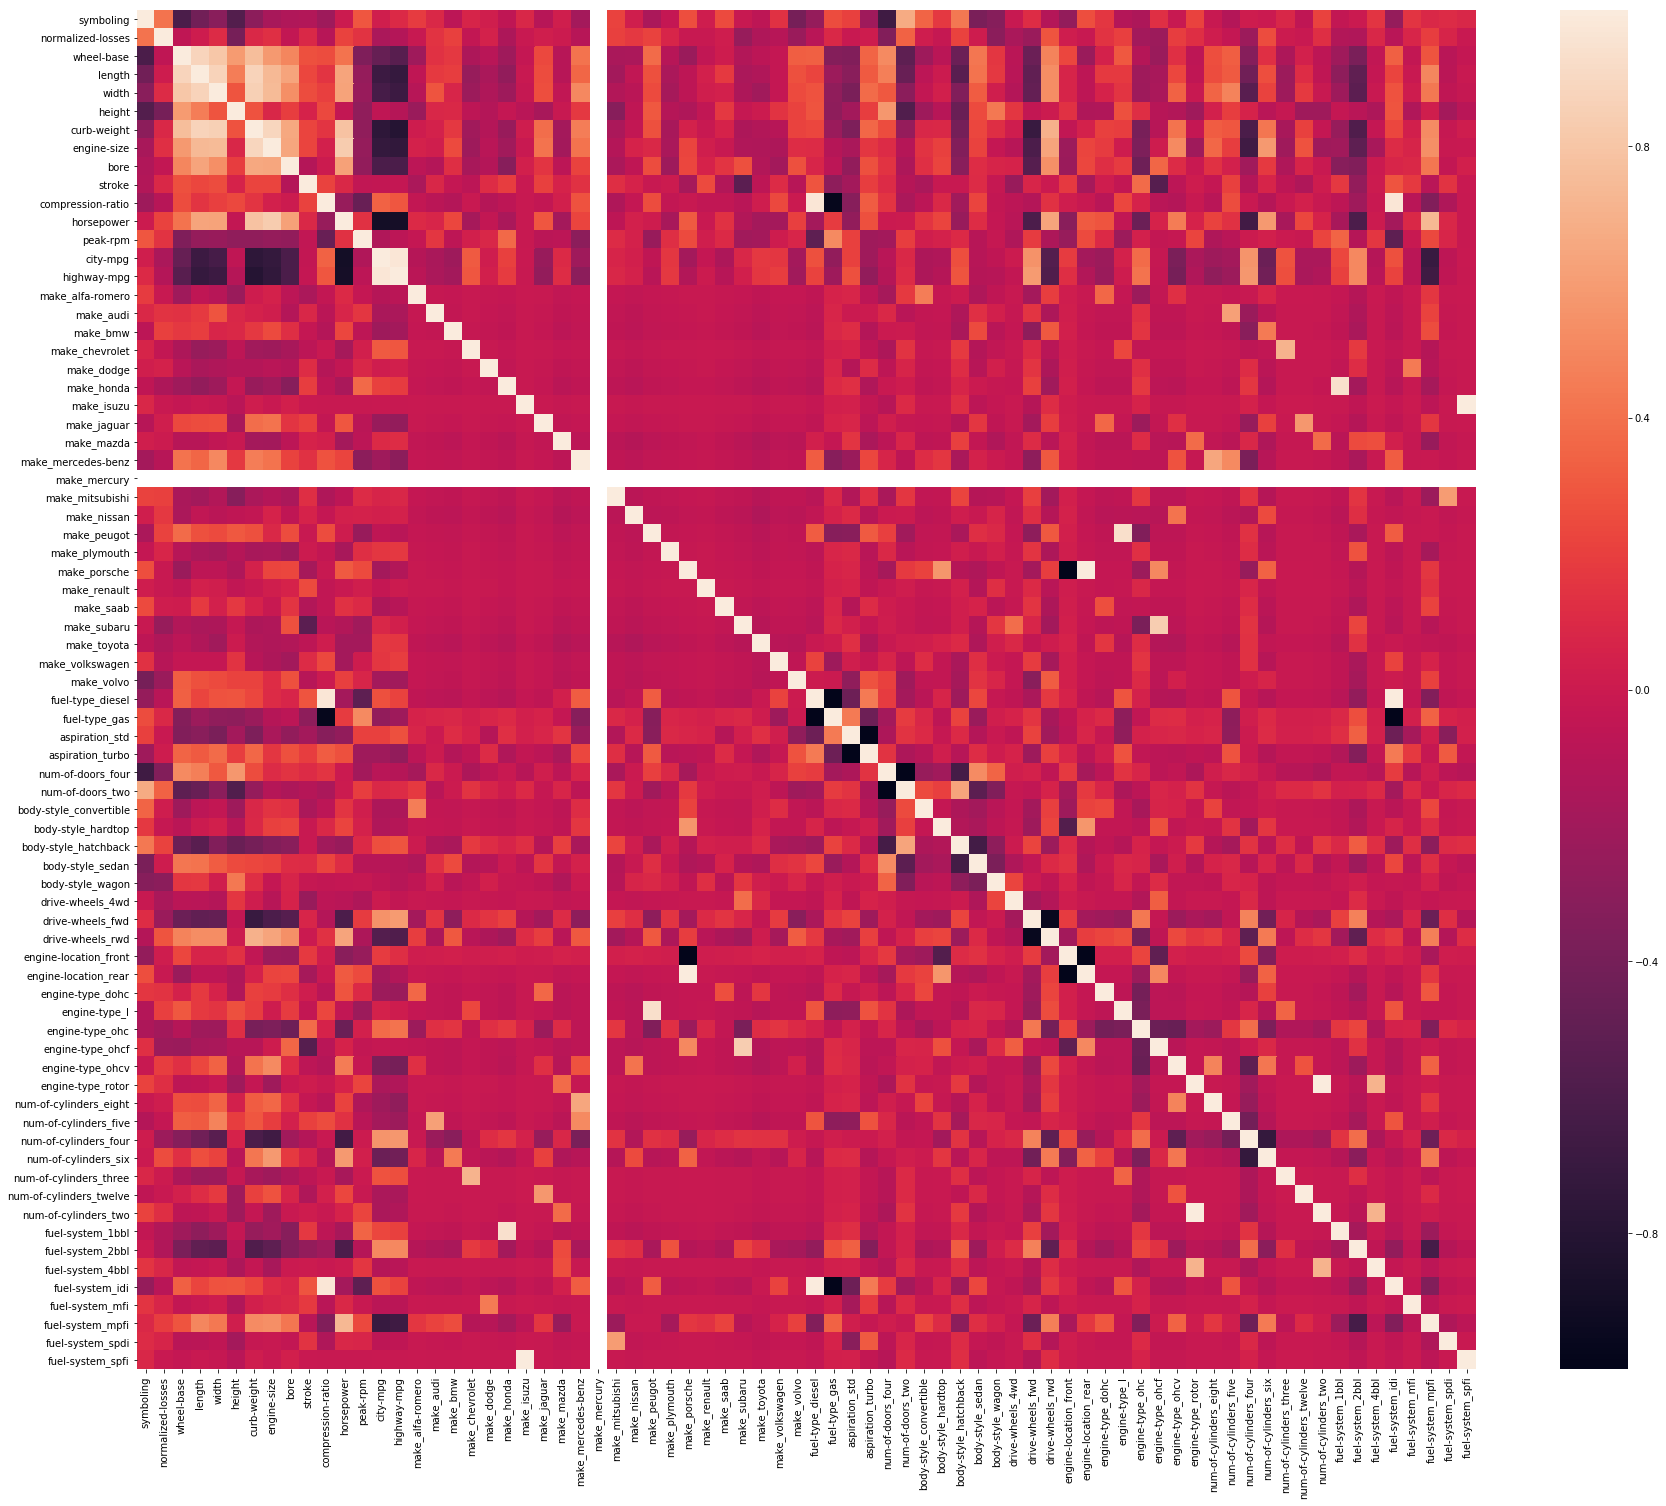

In [71]:
plt.figure(figsize=(30,25))
sns.heatmap(X_train.corr())

### Principal Component Analysis

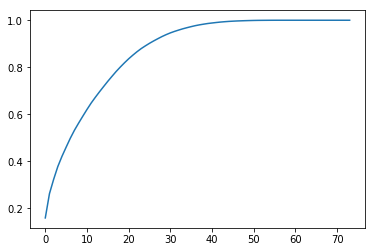

In [72]:
pipe= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',PCA())
])
pipe.fit_transform(X_train,y_train)
plt.plot(pipe.named_steps['pca'].explained_variance_ratio_.cumsum())

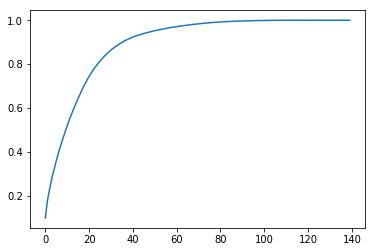

In [73]:
pipe = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipe.fit(X_train, y_train)
plt.plot(pipe.named_steps['pca'].explained_variance_ratio_.cumsum())

### Feature Importance

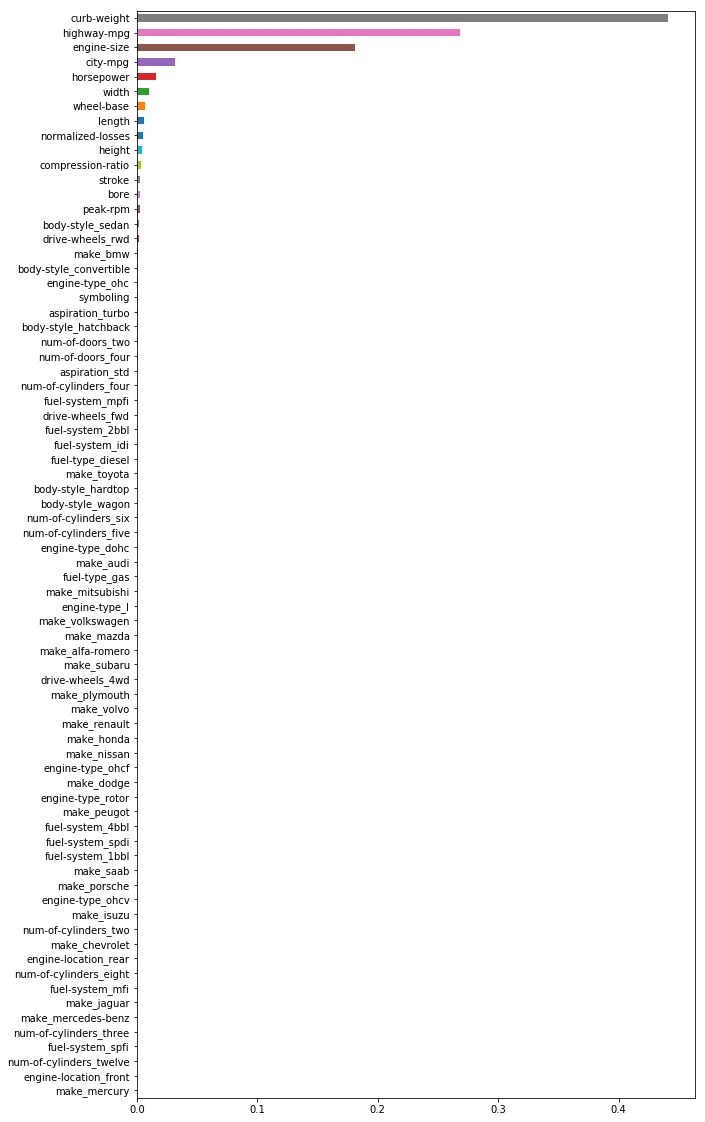

In [74]:
model=RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=12)
model.fit(X_train,y_train)
plt.figure(figsize=(10,20))
feature_importances= pd.Series(model.feature_importances_, index=X_train.columns.values)
feature_importances.sort_values().plot(kind='barh')

#### Features Selected

In [75]:
final_features= feature_importances.sort_values(ascending=False).index.values[:15]
final_features

array(['curb-weight', 'highway-mpg', 'engine-size', 'city-mpg',
       'horsepower', 'width', 'wheel-base', 'length', 'normalized-losses',
       'height', 'compression-ratio', 'stroke', 'bore', 'peak-rpm',
       'body-style_sedan'], dtype=object)

## Model Selection

#### Model1: Ridge Regression

In [45]:
ridge_pipe= Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
parameters= {
    'polynomial_features__degree' :  [2],
    'ridge__alpha' : np.logspace(2,3,10)
}
ridge_model= GridSearchCV(ridge_pipe, parameters, n_jobs=-1, cv=5, verbose=1)
ridge_model.fit(X_train,y_train)
print('best parameters: {}' .format(ridge_model.best_params_))
print('training score: {}' .format(ridge_model.score(X_train,y_train)))
print('test score: {}' .format(ridge_model.score(X_test,y_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.2s finished


best parameters: {'polynomial_features__degree': 2, 'ridge__alpha': 278.2559402207126}
training score: 0.9803703606867167
test score: 0.8586839953559393


#### Model2: Support Vector Machine

In [47]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVR())
])
param_grid = {
    'svm__kernel': ['rbf', 'poly'],
    'svm__degree': [2],
    'svm__C': np.logspace(-3, 3, 10)

}
model = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=1)
model.fit(X_train, y_train)
print('training score: {}' .format(model.score(X_train, y_train)))
print('CV Score: {}'.format(model.best_score_))
print('test score: {}' .format(model.score(X_test, y_test)))
print('best parameters: {}' .format(model.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s


training score: 0.9753743514140638
CV Score: 0.8440121848625225
test score: 0.7654976639667836
best parameters: {'svm__C': 1000.0, 'svm__degree': 2, 'svm__kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished


#### Model 3: Random Forest

In [48]:
pipe = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('rf', RandomForestRegressor())
])
param_grid = {
    'polynomial_features__degree': [2],
    'rf__n_estimators': [200],
    'rf__max_depth': np.arange(1, 6)

}
model = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=1)
model.fit(X_train, y_train)
print('training score: {}' .format(model.score(X_train, y_train)))
print('CV Score: {}'.format(model.best_score_))
print('test score: {}' .format(model.score(X_test, y_test)))
print('best parameters: {}' .format(model.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   40.1s finished


training score: 0.9835171774553062
CV Score: 0.9082268230611318
test score: 0.8633296966087425
best parameters: {'polynomial_features__degree': 2, 'rf__max_depth': 5, 'rf__n_estimators': 200}


#### Model 4: Gradient Boost

In [49]:
%%%time
pipe = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('xgb', XGBRegressor())
])
param_grid = {
    'polynomial_features__degree': [2],
    'xgb__n_estimators': [100],
    'xgb__max_depth': np.arange(1, 6),
    'xgb__learning_rate': np.logspace(-3, -1, 10)
}
model = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=1)
model.fit(X_train, y_train)
print('training score: {}' .format(model.score(X_train, y_train)))
print('CV Score: {}'.format(model.best_score_))
print('test score: {}' .format(model.score(X_test, y_test)))
print('best parameters: {}' .format(model.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 12.5min finished


training score: 0.9942858635979407
CV Score: 0.921188874499099
test score: 0.8762222235049574
best parameters: {'polynomial_features__degree': 2, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Wall time: 12min 36s


#### Model tuning to reduce Overfitting

In [76]:
pipe = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])
param_grid = {
    'polynomial_features__degree': [2],
    'pca__n_components': [0.9],
    'xgb__n_estimators': [200],
    'xgb__max_depth': np.arange(1, 3),
    'xgb__learning_rate': np.logspace(-3, -1, 10)
}
model = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=1)
model.fit(X_train, y_train)
print('training score: {}' .format(model.score(X_train, y_train)))
print('CV Score: {}'.format(model.best_score_))
print('test score: {}' .format(model.score(X_test, y_test)))
print('best parameters: {}' .format(model.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


training score: 0.9880721306192817
CV Score: 0.8835895030237811
test score: 0.7492929046468304
best parameters: {'pca__n_components': 0.9, 'polynomial_features__degree': 2, 'xgb__learning_rate': 0.05994842503189409, 'xgb__max_depth': 2, 'xgb__n_estimators': 200}


#### Making Predictions

In [79]:
y_pred= model.predict(X_test)

### Residual Analysis

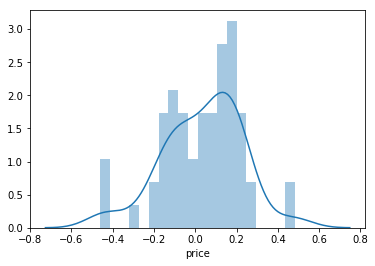

In [80]:
plt.figure()
sns.distplot((y_pred - y_test), bins=20)

##### Model Evaluation

Text(0.5,1,'y_test vs y_pred')

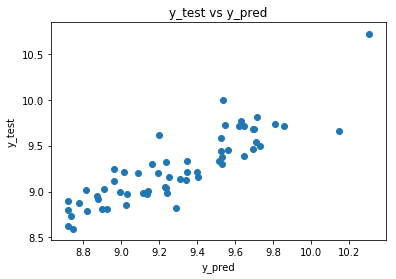

In [83]:
plt.figure()
plt.scatter(y_pred,y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("y_test vs y_pred")

In [86]:
#Error Terms
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('R-sqaure on test data: {}'.format(r2_score(y_test, y_pred)))
print('MAE on test data: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE on test data: {}'.format(mean_squared_error(y_test, y_pred)))

R-sqaure on test data: 0.7492929046468304
MAE on test data: 0.15665005672371535
MSE on test data: 0.036823230833431884


Text(0.5,0,'Index')

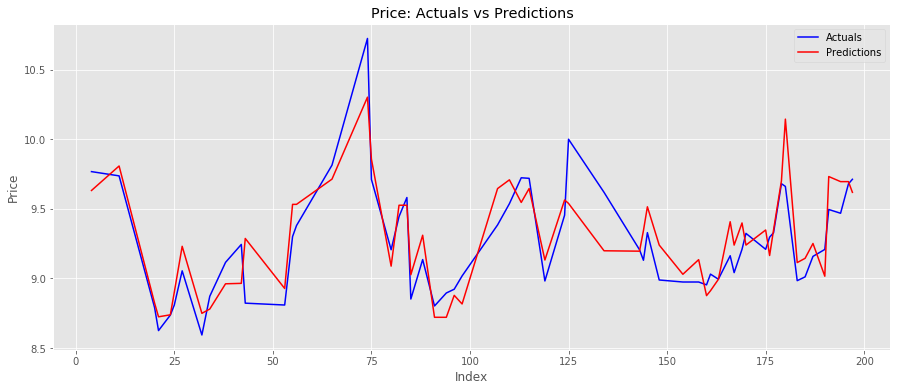

In [87]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')